# 2021-08-30

SW

Here's a quick demonstration of the tools module in the git repo

Will use a quick path hack to load in the ngif_romar module, later when we package this this shouldn't be necessary

In [1]:
import sys
import os
import importlib # Used during testing if I need to reload modules

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
try:
    import ngif_romar.tools
except ModuleNotFoundError as error:
    # If not in path/installed, use relative import
    module_path = os.path.abspath(os.path.join(".."))
    sys.path.append(module_path)
    import ngif_romar.tools as tools

In [3]:
dataset_path = os.path.join("..", "data", "SN2", "20200930_1500_")
logfile_path = os.path.join(dataset_path, "Data.dat")
meta_dict, data_df = tools.read_data(logfile_path)

File read in appropriately:

In [4]:
data_df.head()

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,revolutionSpeed_1,powderGasFlow_1,stirrerValue_2,revolutionSpeed_2,powderGasFlow_2,flowWatch,meltpoolThreshold,protectionGlasTemperature
0,31201,0.0,0.0,0.0,0.0,0.0,8700,1752.0,2000,500,400,600,0,0,0,2872,506,19.2
1,31301,0.0,0.0,0.0,0.0,0.0,10465,1747.0,2000,500,400,600,0,0,0,2872,506,19.2
2,31401,0.0,0.0,0.0,0.0,0.0,10132,1760.0,2000,500,400,600,0,0,0,2872,506,19.2
3,31501,0.0,0.0,0.0,0.0,0.0,9926,1764.0,2000,500,400,600,0,0,0,2864,506,19.2
4,31601,0.0,0.0,0.0,0.0,0.0,10454,1767.0,2000,500,400,600,0,0,0,2864,506,19.2


Now add derived features, such as velocities etc

In [5]:
data_df = tools.post_process_log_data(data_df)
data_df.head()

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,t(min),v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms)
0,31201,0.0,0.0,0.0,0.0,0.0,8700,1752.0,2000,500,...,0.520017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,31301,0.0,0.0,0.0,0.0,0.0,10465,1747.0,2000,500,...,0.521683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0
2,31401,0.0,0.0,0.0,0.0,0.0,10132,1760.0,2000,500,...,0.523350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200,0
3,31501,0.0,0.0,0.0,0.0,0.0,9926,1764.0,2000,500,...,0.525017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300,0
4,31601,0.0,0.0,0.0,0.0,0.0,10454,1767.0,2000,500,...,0.526683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,0


In [6]:
data_df.keys()

Index(['t', 'x', 'y', 'z', 'a', 'c', 'meltpoolSize', 'meltpoolTemp',
       'LaserPower', 'stirrerValue_1', 'revolutionSpeed_1', 'powderGasFlow_1',
       'stirrerValue_2', 'revolutionSpeed_2', 'powderGasFlow_2', 'flowWatch',
       'meltpoolThreshold', 'protectionGlasTemperature', 't(s)', 't(min)',
       'v_x(mm/ms)', 'v_y(mm/ms)', 'v_z(mm/ms)', '|v|(mm/ms)', 'phi(rad)',
       'r(mm)', 'phi_dot(rad/ms)', 'laser_on_time(ms)', 'laser_off_time(ms)'],
      dtype='object')

Now we have a bunch more columns, etc

Match to camera filenames

In [7]:
print(os.listdir(dataset_path))
frames_path = os.path.join(dataset_path, "Frames")

['Data.dat', 'Frames', 'SN2_Run1_Time_Data.txt']


In [8]:
data_df = tools.link_camera_frames_to_df(data_df, frame_folder_path=frames_path)

In [9]:
data_df.head()

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),matching_frame_filename
0,31201,0.0,0.0,0.0,0.0,0.0,8700,1752.0,2000,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,20200930_150110__31127.dat
1,31301,0.0,0.0,0.0,0.0,0.0,10465,1747.0,2000,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0,20200930_150110__31127.dat
2,31401,0.0,0.0,0.0,0.0,0.0,10132,1760.0,2000,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200,0,20200930_150110__31127.dat
3,31501,0.0,0.0,0.0,0.0,0.0,9926,1764.0,2000,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300,0,20200930_150110__31127.dat
4,31601,0.0,0.0,0.0,0.0,0.0,10454,1767.0,2000,500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400,0,20200930_150110__31127.dat


Now through up some quick plots to demonstrate everything is reasonable

In [10]:
frame_names = sorted(os.listdir(frames_path))

Quick diversion: want to show that the eight bit images are appropriately rescaled from 12 bit

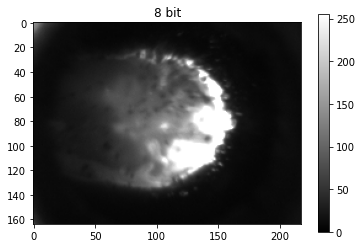

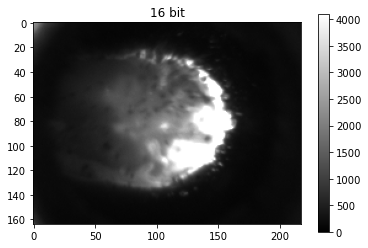

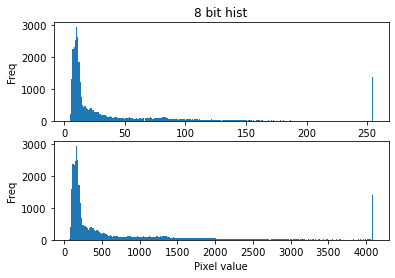

In [11]:
frame_idx = 100

frame_a = tools.read_and_convert_image(os.path.join(frames_path, frame_names[frame_idx]), eight_bit=True)
frame_b = tools.read_and_convert_image(os.path.join(frames_path, frame_names[frame_idx]), eight_bit=False)

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame_a, cmap='gray', vmin=0, vmax=255)
fig.colorbar(imshow_result)
ax.set_title("8 bit")
plt.show()

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame_b, cmap='gray', vmin=0, vmax=4095)
fig.colorbar(imshow_result)
ax.set_title("16 bit")
plt.show()

fig, axs = plt.subplots(2,1)

ax = axs[0]
ax.hist(frame_a.flatten(), bins=255)
ax.set_title("8 bit hist")
ax.set_ylabel("Freq")
ax.set_xlabel("Pixel value")

ax = axs[1]
ax.hist(frame_b.flatten(), bins=255)
ax.set_ylabel("Freq")
ax.set_xlabel("Pixel value")

plt.show()

So the rescaling done in the tools module is appropriate

In [12]:
importlib.reload(tools)

<module 'ngif_romar.tools' from 'C:\\Users\\Scott Williams\\Documents\\programming\\ngif_romar\\ngif_romar\\tools.py'>

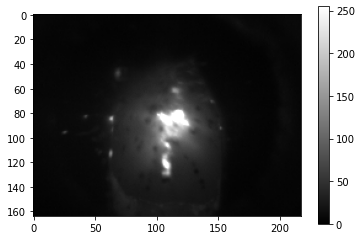

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),matching_frame_filename
35,34701,-12.150,42.898,62.041,30.0,-188.309,6721,1695.0,2000,500,...,-0.052400,0.216820,0.310210,0.382082,1.846798,44.585434,0.009040,3500,0,20200930_150114__35130.dat
36,34801,-10.480,43.364,62.042,30.0,-190.535,6547,1680.0,2000,500,...,0.015855,0.003885,0.000015,0.016324,1.807925,44.612407,-0.000366,3600,0,20200930_150114__35130.dat
37,34901,-8.979,43.675,62.044,30.0,-192.503,6084,1688.0,2000,500,...,0.007505,0.001555,0.000010,0.007664,1.773558,44.588430,-0.000172,3700,0,20200930_150114__35130.dat
38,35001,-8.979,43.675,62.044,30.0,-192.503,6527,1687.0,2000,500,...,0.012130,0.002205,0.000005,0.012329,1.773558,44.588430,-0.000276,3800,0,20200930_150114__35130.dat
39,35101,-6.553,44.116,62.045,30.0,-195.669,6104,1691.0,2000,500,...,0.020395,0.003285,0.000015,0.020658,1.718258,44.600037,-0.000463,3900,0,20200930_150114__35130.dat
40,35201,-4.900,44.332,62.047,30.0,-197.808,6300,1680.0,2000,500,...,0.016560,0.001835,0.000015,0.016661,1.680879,44.601976,-0.000374,4000,0,20200930_150114__35130.dat
41,35301,-3.241,44.483,62.048,30.0,-199.948,6469,1686.0,2000,500,...,0.016615,0.001240,0.000010,0.016661,1.643527,44.600912,-0.000374,4100,0,20200930_150114__35130.dat
42,35401,-1.577,44.580,62.049,330.0,-22.087,6570,1683.0,2000,500,...,0.016650,0.000595,0.000010,0.016661,1.606156,44.607884,-0.000374,4200,0,20200930_150114__35130.dat
43,35501,0.089,44.602,62.050,30.0,-204.229,6640,1685.0,2000,500,...,0.016660,-0.000005,0.000010,0.016660,1.568801,44.602089,-0.000374,4300,0,20200930_150114__35130.dat
44,35601,1.755,44.579,62.051,30.0,-206.371,6820,1681.0,2000,500,...,0.016975,-0.000675,0.000010,0.016988,1.531448,44.613532,-0.000381,4400,0,20200930_150114__35130.dat


In [13]:
# Let's display the rows associated to a frame as a demonstration
frame_idx = 4
frame = tools.read_and_convert_image(os.path.join(frames_path, frame_names[frame_idx]), eight_bit=True)

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
# imshow_result = ax.imshow(frame, cmap='gray')
fig.colorbar(imshow_result)
plt.show()

data_df[
    data_df["matching_frame_filename"] == frame_names[frame_idx]
]



In [14]:
# Lets show one with laser off and laser on

laser_off_frames = np.unique(data_df[
    data_df["laser_off_time(ms)"] > 500
]["matching_frame_filename"].values)

laser_on_frames = np.unique(data_df[
    data_df["laser_on_time(ms)"] > 500
]["matching_frame_filename"].values)

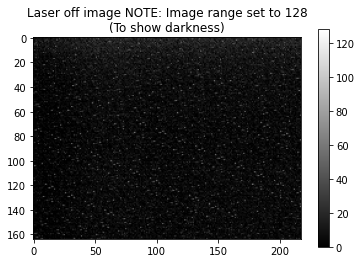

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),matching_frame_filename
365,67701,410.068,-316.544,-77.910,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.066670,0.066670,-0.65739,518.03076,0.0,0,2600,20200930_150147__68158.dat
366,67801,410.068,-316.544,-71.243,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.065335,0.065335,-0.65739,518.03076,0.0,0,2700,20200930_150147__68158.dat
367,67901,410.068,-316.544,-64.843,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.065330,0.065330,-0.65739,518.03076,0.0,0,2800,20200930_150147__68158.dat
368,68001,410.068,-316.544,-58.177,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.066665,0.066665,-0.65739,518.03076,0.0,0,2900,20200930_150147__68158.dat
369,68101,410.068,-316.544,-51.510,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.068000,0.068000,-0.65739,518.03076,0.0,0,3000,20200930_150147__68158.dat
370,68201,410.068,-316.544,-44.577,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.068000,0.068000,-0.65739,518.03076,0.0,0,3100,20200930_150147__68158.dat
371,68301,410.068,-316.544,-37.910,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.066670,0.066670,-0.65739,518.03076,0.0,0,3200,20200930_150147__68158.dat
372,68401,410.068,-316.544,-31.243,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.073335,0.073335,-0.65739,518.03076,0.0,0,3300,20200930_150147__68158.dat
373,68501,410.068,-316.544,-23.243,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.069330,0.069330,-0.65739,518.03076,0.0,0,3400,20200930_150147__68158.dat
374,68601,410.068,-316.544,-17.377,113.725,-30.0,0,25.0,0,500,...,0.0,0.0,0.062665,0.062665,-0.65739,518.03076,0.0,0,3500,20200930_150147__68158.dat


In [15]:
# Let's display the rows associated to a frame as a demonstration
frame_idx = 2
frame = tools.read_and_convert_image(os.path.join(frames_path, laser_off_frames[frame_idx]), eight_bit=False)
frame = cv2.convertScaleAbs(frame)

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=128)
fig.colorbar(imshow_result)
ax.set_title("Laser off image NOTE: Image range set to 128\n(To show darkness)")
plt.show()

data_df[
    data_df["matching_frame_filename"] == laser_off_frames[frame_idx]
]



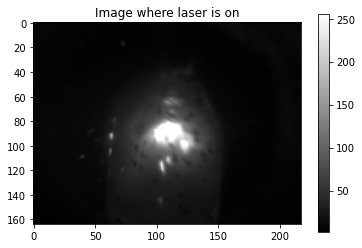

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),matching_frame_filename
55,36701,20.318,39.743,62.065,30.0,128.783,6011,1690.0,2000,500,...,0.015125,-0.007745,0.000010,0.016993,1.098201,44.635492,-0.000381,5500,0,20200930_150116__37132.dat
56,36801,21.840,38.916,62.066,30.0,126.557,6500,1685.0,2000,500,...,0.014555,-0.008105,0.000010,0.016660,1.059388,44.625561,-0.000373,5600,0,20200930_150116__37132.dat
57,36901,23.229,38.122,62.067,30.0,124.503,6615,1687.0,2000,500,...,0.006945,-0.003970,0.000005,0.008000,1.023542,44.641610,-0.000179,5700,0,20200930_150116__37132.dat
58,37001,23.229,38.122,62.067,30.0,124.503,6630,1700.0,2000,500,...,0.010320,-0.006750,0.000010,0.012331,1.023542,44.641610,-0.000276,5800,0,20200930_150116__37132.dat
59,37101,25.293,36.772,62.069,30.0,121.336,6481,1692.0,2000,500,...,0.016080,-0.010725,0.000015,0.019329,0.968283,44.630884,-0.000433,5900,0,20200930_150116__37132.dat
60,37201,26.445,35.977,62.070,30.0,119.538,6645,1681.0,2000,500,...,0.012330,-0.009105,0.000010,0.015327,0.936930,44.650672,-0.000343,6000,0,20200930_150116__37132.dat
61,37301,27.759,34.951,62.071,30.0,117.398,7227,1685.0,2000,500,...,0.013055,-0.010360,0.000015,0.016666,0.899586,44.633334,-0.000373,6100,0,20200930_150116__37132.dat
62,37401,29.056,33.905,62.073,30.0,115.258,6276,1695.0,2000,500,...,0.012665,-0.010820,0.000015,0.016658,0.862262,44.651989,-0.000373,6200,0,20200930_150116__37132.dat
63,37501,30.292,32.787,62.074,30.0,113.118,6912,1687.0,2000,500,...,0.012245,-0.011300,0.000010,0.016662,0.824931,44.638466,-0.000373,6300,0,20200930_150116__37132.dat
64,37601,31.505,31.645,62.075,30.0,110.977,6184,1689.0,2000,500,...,0.011820,-0.011735,0.000010,0.016656,0.787615,44.653903,-0.000373,6400,0,20200930_150116__37132.dat


In [16]:

# Let's display the rows associated to a frame as a demonstration
frame_idx = 5
frame = tools.read_and_convert_image(os.path.join(frames_path, laser_on_frames[frame_idx]))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray')
fig.colorbar(imshow_result)
ax.set_title("Image where laser is on")
plt.show()

data_df[
    data_df["matching_frame_filename"] == laser_on_frames[frame_idx]
]



Note that there's a bunch of frames where the laser is switching off/has just switched off, lets show one

In [17]:
transition_rows = data_df[
    (
        (data_df["laser_on_time(ms)"] > 0)
        & (data_df["laser_on_time(ms)"] < 200)
    )
    | (
        (data_df["laser_off_time(ms)"] > 0)
        & (data_df["laser_off_time(ms)"] < 200)
    )
]
transition_frames = np.unique(transition_rows["matching_frame_filename"].values)

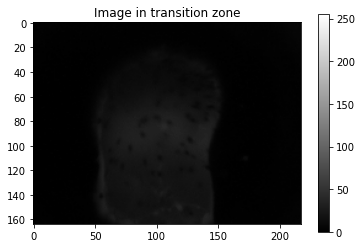

,t,x,y,z,a,c,meltpoolSize,meltpoolTemp,LaserPower,stirrerValue_1,...,v_x(mm/ms),v_y(mm/ms),v_z(mm/ms),|v|(mm/ms),phi(rad),r(mm),phi_dot(rad/ms),laser_on_time(ms),laser_off_time(ms),matching_frame_filename
335,64701,-44.632,-7.004,62.395,30.000,-105.538,10485,1764.0,2000,500,...,-0.002610,0.016455,0.000010,0.016661,-2.985934,45.178219,-0.000369,33500,0,20200930_150144__65157.dat
336,64801,-44.879,-5.356,62.396,30.000,-107.667,10390,1761.0,2000,500,...,-0.001990,0.016540,0.000010,0.016659,-3.022811,45.197471,-0.000369,33600,0,20200930_150144__65157.dat
337,64901,-45.030,-3.696,62.397,30.000,-109.796,10377,1766.0,2000,500,...,-0.001390,0.016610,0.000015,0.016668,-3.059698,45.181427,-0.000369,33700,0,20200930_150144__65157.dat
338,65001,-45.157,-2.034,62.399,30.000,-111.926,10368,1770.0,2000,500,...,-0.000990,0.016540,0.000015,0.016570,-3.096580,45.202785,-0.000367,33800,0,20200930_150144__65157.dat
339,65101,-45.228,-0.388,62.400,30.000,-114.031,10395,1743.0,2000,500,...,-0.000430,0.010225,0.000005,0.010234,-3.133014,45.229664,-0.000226,33900,0,20200930_150144__65157.dat
340,65201,-45.243,0.011,62.400,30.000,-114.541,0,25.0,0,500,...,-0.000075,0.001995,0.005865,0.006195,3.141350,45.243001,-0.000044,0,100,20200930_150144__65157.dat
341,65301,-45.243,0.011,63.573,30.000,-114.541,0,25.0,0,500,...,0.224655,-0.107505,-0.140090,0.285749,3.141350,45.243001,0.007783,0,200,20200930_150144__65157.dat
342,65401,-0.312,-21.490,34.382,89.592,-30.000,0,25.0,0,500,...,2.276555,-1.582775,-1.432750,3.121002,-1.585314,21.492265,0.012422,0,300,20200930_150144__65157.dat
343,65501,410.068,-316.544,-222.977,113.725,-30.000,0,25.0,0,500,...,2.051900,-1.475270,-1.250795,2.819788,-0.657390,518.030760,0.004640,0,400,20200930_150144__65157.dat
344,65601,410.068,-316.544,-215.777,113.725,-30.000,0,25.0,0,500,...,0.000000,0.000000,0.068000,0.068000,-0.657390,518.030760,0.000000,0,500,20200930_150144__65157.dat


In [18]:

# Let's display the rows associated to a frame as a demonstration
frame_idx = 1
frame = tools.read_and_convert_image(os.path.join(frames_path, transition_frames[frame_idx]))

fig, ax = plt.subplots()
imshow_result = ax.imshow(frame, cmap='gray', vmin=0, vmax=255)
fig.colorbar(imshow_result)
ax.set_title("Image in transition zone")
plt.show()

data_df[
    data_df["matching_frame_filename"] == transition_frames[frame_idx]
]